# Understanding Peer-to-Peer Lending: Exploring the Prosper Loan Dataset

## Investigation Overview
In this comprehensive report, we delve into the Prosper loan dataset, a vast collection of 113,937 individual loans facilitated by Prosper. Our investigation aims to uncover valuable insights into peer-to-peer lending activities, borrower profiles, and loan performance. Through data exploration and analysis, we aim to enhance our understanding of the lending process, identify borrower characteristics, and reveal patterns that can inform decision-making processes in the financial industry.

## Dataset Overview
The Prosper loan dataset comprises 113,937 rows and 81 columns. Through data wrangling and visualization, we analyzed credit scores, loan terms, amounts, homeownership, and income verification among borrowers. Bivariate analysis showed correlations between loan attributes, and multivariate analysis explored payment amounts and loan amounts. The insights gained can enhance risk assessment, lending strategies, and customer targeting. Acknowledging limitations such as biases and missing data is crucial for accurate findings and models

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
loan = pd.read_csv('prosperLoanData-clean.csv')

## Exploring Credit Score Distribution in the Prosper Loan Dataset
The upper credit score range distribution tends to be slightly shifted towards higher scores compared to the lower credit score range. However, there are concerns about some potential outliers in the data, such as extremely low values for 'CreditScoreRangeUpper' and 'CreditScoreRangeLower', which need further investigation for data accuracy and reliability.

In [3]:
# Defining the color for the histogram bars using the first color from the seaborn color palette.
color = sns.color_palette()[0]

# Specifying the size of each bin for the histograms as 10, and generating the bin edges using numpy 'arange'.
binsize = 10
bins = np.arange(400, loan['CreditScoreRangeUpper'].max() + binsize, binsize)


## Credit Score Lower Count

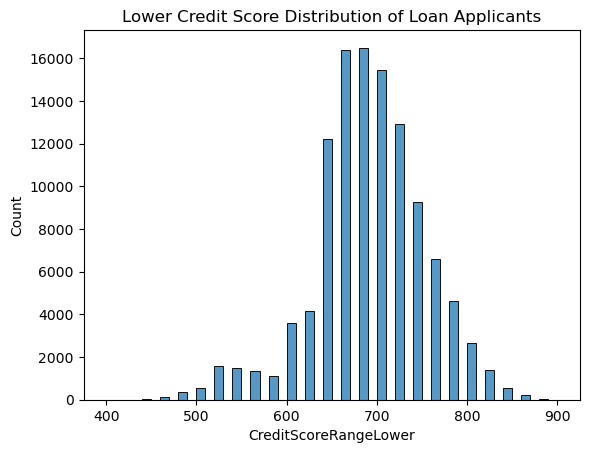

In [4]:
# Plotting a histogram of the 'CreditScoreRangeLower' column from the 'loan' dataset with specified bins and color, on the first subplot.
sns.histplot(loan['CreditScoreRangeLower'], bins=bins, color=color);
plt.title("Lower Credit Score Distribution of Loan Applicants");

## Credit Score Upper Count

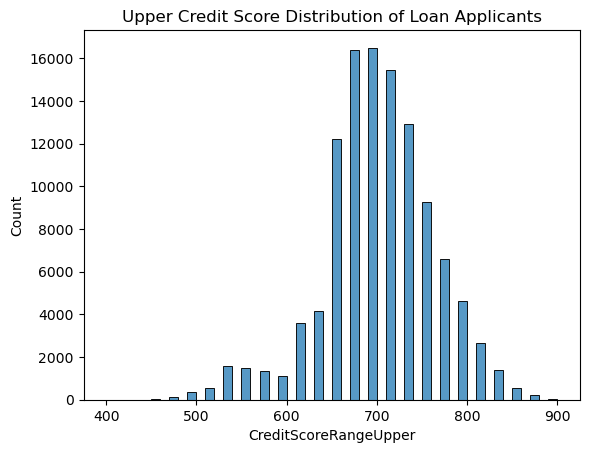

In [5]:
# Plotting a histogram of the 'CreditScoreRangeUpper' column from the 'loan' dataset with specified bins and color, on the second subplot.
sns.histplot(loan['CreditScoreRangeUpper'], bins=bins, color=color);
plt.title("Upper Credit Score Distribution of Loan Applicants");

## Exploring Loan Terms and Loan Numbers: A 2D Histogram Analysis
The plot shows a relatively uniform distribution of loans across different combinations, with the most common combination having 9,378 loans. This analysis helps identify popular loan terms and loan numbers, supporting data-driven decision-making in the lending industry.

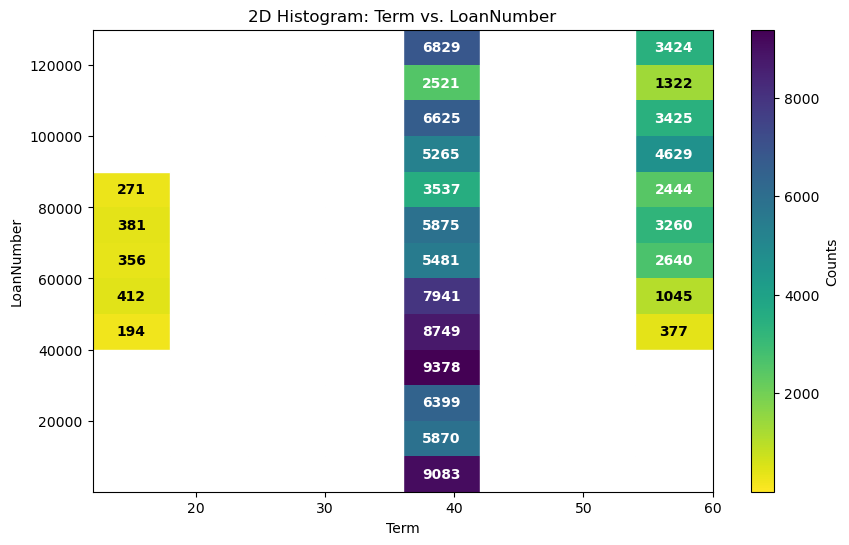

In [6]:
# Sample data
term_data = loan['Term']
loan_number_data = loan['LoanNumber']

# Specify bin edges for Term & LoanNumber
term_bins = np.arange(12, 61, 6)  # Bin edges for Term from 12 to 60 with a step of 6
loan_number_bins = np.arange(1, 136487, 10000)  # Bin edges for LoanNumber from 1 to 136486 with a step of 10000

# Create the 2D histogram using numpy.histogram2d
hist, x_edges, y_edges = np.histogram2d(term_data, loan_number_data, bins=[term_bins, loan_number_bins])

#Set up the plot with a white background
plt.figure(figsize=(10, 6), facecolor='white')
plt.imshow(hist.T, cmap='viridis_r', origin='lower', aspect='auto', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], interpolation='nearest', vmin=0.1)

# Add text annotation on each cell
for i in range(len(term_bins) - 1):
    for j in range(len(loan_number_bins) - 1):
        count = hist[i, j]
        if count >= 2000:  # Only add annotations for counts greater than or equal to 2000
            plt.text(term_bins[i] + 3, loan_number_bins[j] + 5000, int(count), ha='center', va='center', color='white', fontweight='bold')
        elif count > 0:
            plt.text(term_bins[i] + 3, loan_number_bins[j] + 5000, int(count), ha='center', va='center', color='black', fontweight='bold')
        else:  # Count is 0, make the cell white
            cell_rect = plt.Rectangle((term_bins[i], loan_number_bins[j]), 6, 10000, fill=True, color='white')
            plt.gca().add_patch(cell_rect)
            
# Add labels and title
plt.xlabel('Term')
plt.ylabel('LoanNumber')
plt.title('2D Histogram: Term vs. LoanNumber')

# Add color bar
cbar = plt.colorbar()
cbar.set_label('Counts')

# Show the plot
plt.show()

## Loan Status and Borrower Income Insights
 Over time, the number of loans labeled as "Current" has consistently remained the highest, indicating borrowers' ongoing efforts to maintain good standing with their loans. Additionally, there has been a positive trend in the count of "Completed" loans, and a decline in the number of "Charged Off" loans, reflecting improved repayment rates or lending practices.

In [7]:
# Sort 'IncomeRange' and 'Year of Loan'
income_order = ['Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                '$75,000-99,999', '$100,000+']

loan['IncomeRange'] = pd.Categorical(loan['IncomeRange'], categories=income_order, ordered=True)

year_order = sorted(loan['Year of Loan'].unique())

loan['Year of Loan'] = pd.Categorical(loan['Year of Loan'], categories=year_order, ordered=True)


order = loan['LoanStatus'].value_counts()
order_index = order.index

### Loan Status vs. Income Range

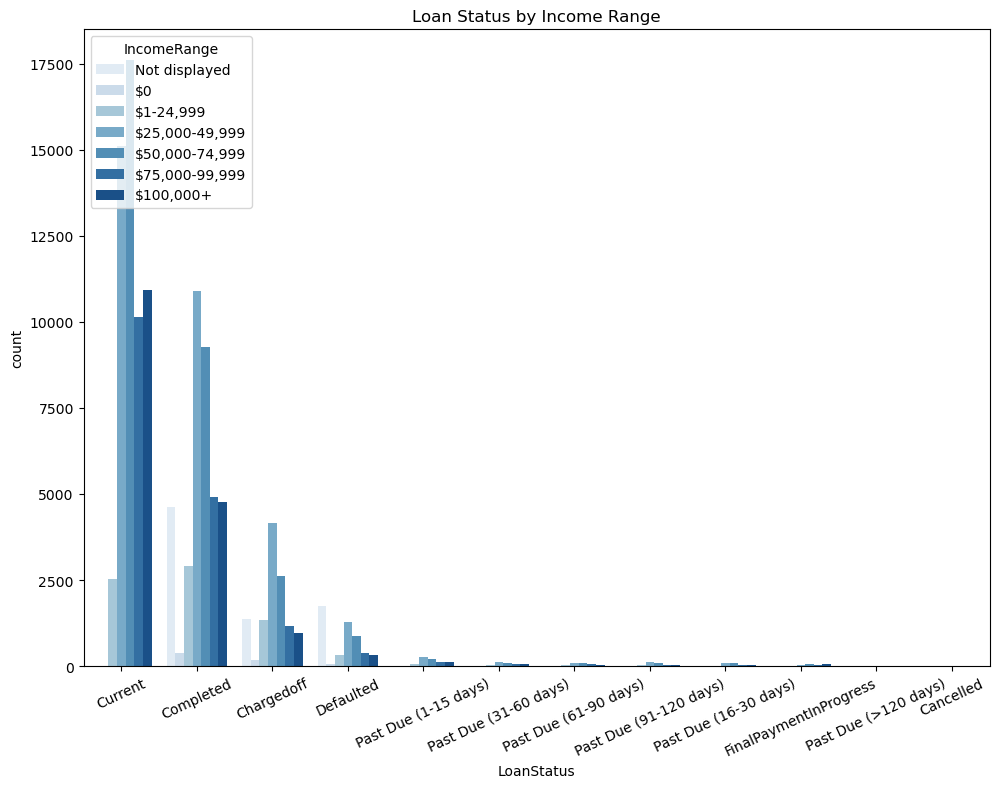

In [8]:
plt.figure(figsize = [11.69, 8.27])

# subplot 1: LoanStatus vs IncomeRange
sns.countplot(data = loan, x = 'LoanStatus', hue = 'IncomeRange', palette = 'Blues', order = order_index);
plt.xticks(rotation=25);
plt.title('Loan Status by Income Range');

## Loan Status vs. Year of Loan

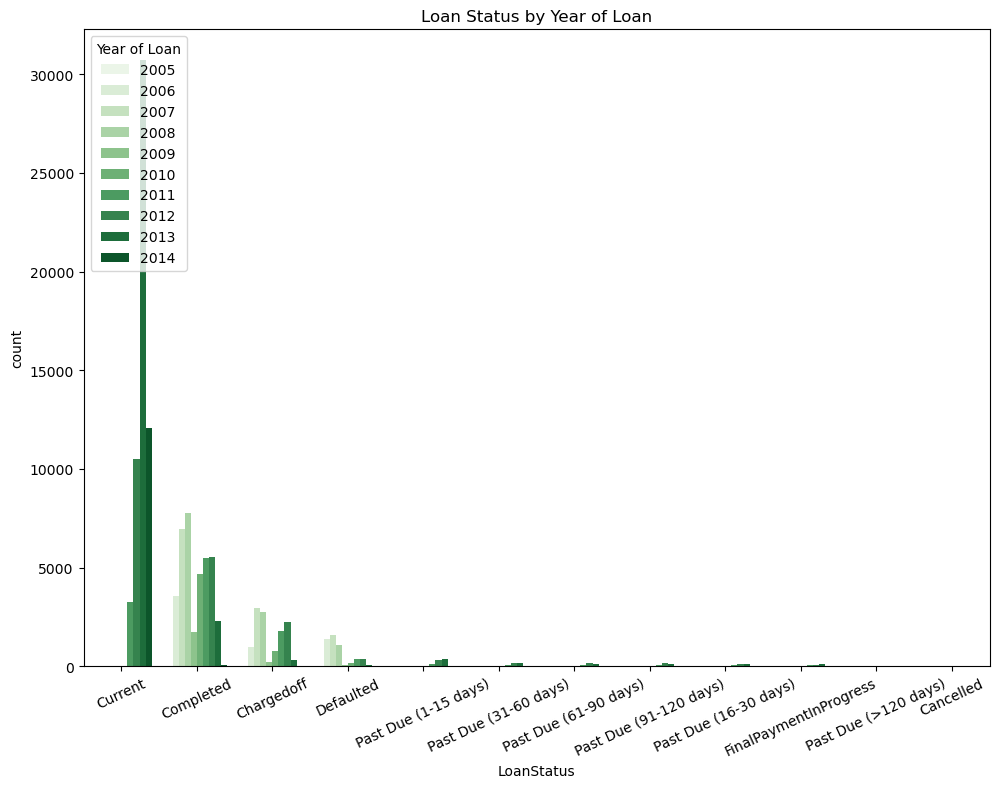

In [9]:
plt.figure(figsize = [11.69, 8.27])

#subplot 2: clarity vs. cut
sns.countplot(data = loan, x = 'LoanStatus', hue = 'Year of Loan', palette = 'Greens', order = order_index);
plt.xticks(rotation=25);
plt.title('Loan Status by Year of Loan');

## Relationship Between Monthly Loan Payment, Loan Original Amount, and Income Range
This scatter plot reveals a robust positive correlation (0.93) between Monthly Loan Payment and Loan Original Amount. Borrowers with higher income ranges tend to have larger loans and higher monthly payments. The dataset contains various loan amounts across different income ranges, with "$100,000+" income range having the highest average Loan Original Amount ($13,103.63). Understanding this relationship helps tailor loan products to income groups and enhances risk assessment strategies.


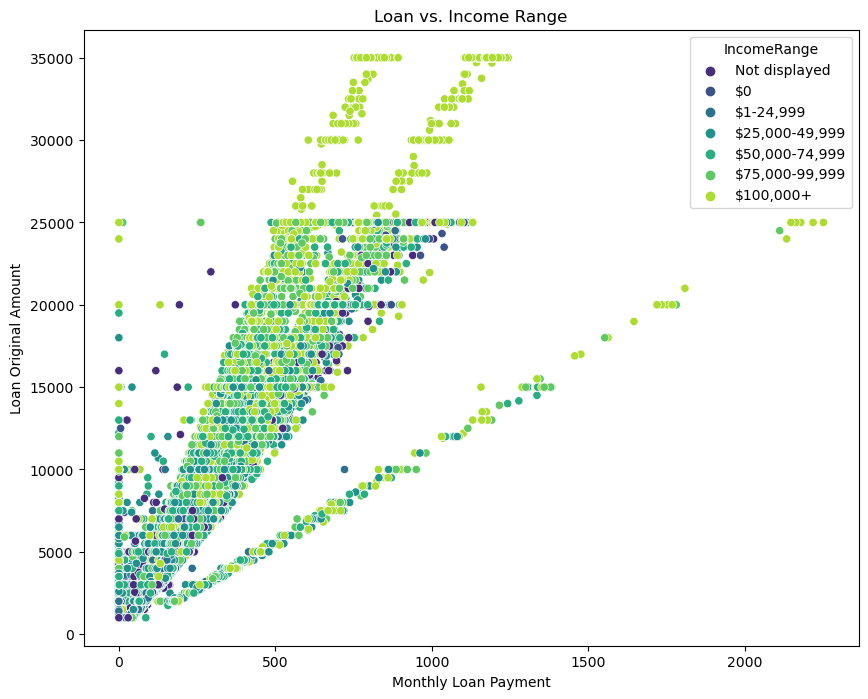

In [10]:
# Plotting the scatter plot
plt.figure(figsize=[10, 8])

# Create the scatter plot
sns.scatterplot(data=loan, x='MonthlyLoanPayment', y='LoanOriginalAmount', hue='IncomeRange', palette='viridis')

# Set axis labels and title
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Loan Original Amount')
plt.title('Loan vs. Income Range')

plt.show()

In [ ]:
!jupyter nbconvert Part_II_Explanatory.ipynb --to slides --post serve --no-input --no-prompt